# Hotel Booking Cancellation Prediction

## Contents


## 1) Problem statement and objective

This increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal - they are facing problems with this high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a Data Scientist, have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## 2) Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below:


**Data Dictionary**

* **Booking_ID:** Unique identifier of each booking
* **no_of_adults:** Number of adults
* **no_of_children:** Number of children
* **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights:** Number of weekday nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan:** Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time:** Number of days between the date of booking and the arrival date
* **arrival_year:** Year of arrival date
* **arrival_month:** Month of arrival date
* **arrival_date:** Date of the month
* **market_segment_type:** Market segment designation.
* **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:** Flag indicating if the booking was canceled or not.

## 3) Importing the required libraries and loading the dataset

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() # Not sure what this does

# Import ML models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import scalers and model selection functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# Import module for metric scores
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, precision_recall_curve, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer

#Code to ignore warning from function usage
import warnings;
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
hotel = pd.read_csv('INNHotelsGroup.csv')

# Make a copy of the data to preserve original
df = hotel.copy()

## 4) Inspect the attributes of the dataset and perform investigations for general clean up 

In [3]:
df.shape

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Good dataset with no null values

In [5]:
#check for duplicated values

df.duplicated().sum()

0

In [6]:
df = df.drop(['Booking_ID'], axis=1) # All unique value will not be useful for analysis and there are no trends

df.info()

In [7]:
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [8]:
df.no_of_special_requests.unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

Categorical variables: type_of_meal_plan, required_car_parking_space, room_type_reserved, arrival_year, 
    arrival_month, arrival_date, market_segment_type, repeated_guest, booking_status

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


## 5) Exploratory data analysis

### 5.1 Univariate analysis for assess the distribution of different attributes

In [10]:
cats = ['no_of_adults', 'no_of_children', 'type_of_meal_plan', 'required_car_parking_space', 
        'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 
        'repeated_guest', 'no_of_special_requests', 'booking_status']
len(cats)

12

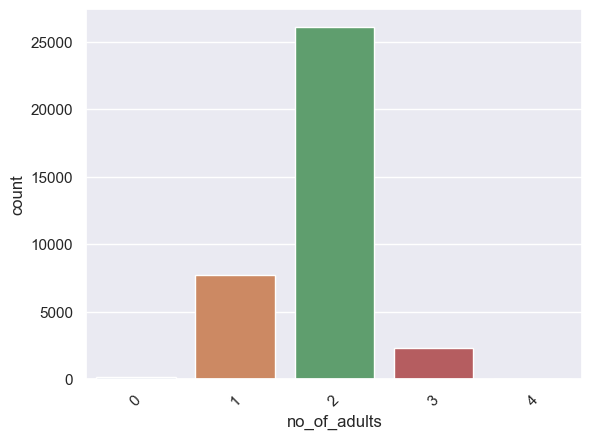

Counts: 
 2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64 

Normalized: 
 2    71.972433
1    21.212957
3     6.387319
0     0.383184
4     0.044108
Name: no_of_adults, dtype: float64

 --------------------x-------------------------


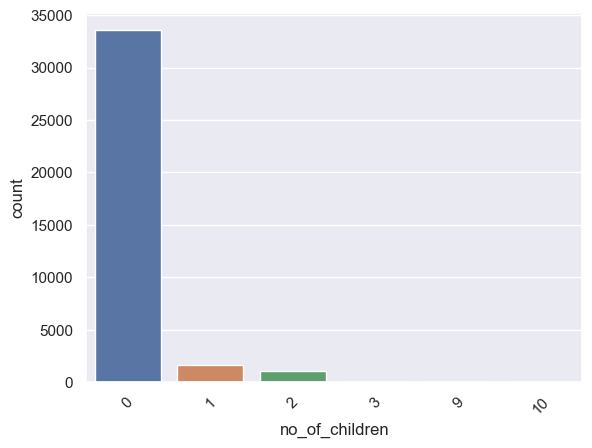

Counts: 
 0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64 

Normalized: 
 0     92.562371
1      4.460372
2      2.916609
3      0.052378
9      0.005513
10     0.002757
Name: no_of_children, dtype: float64

 --------------------x-------------------------


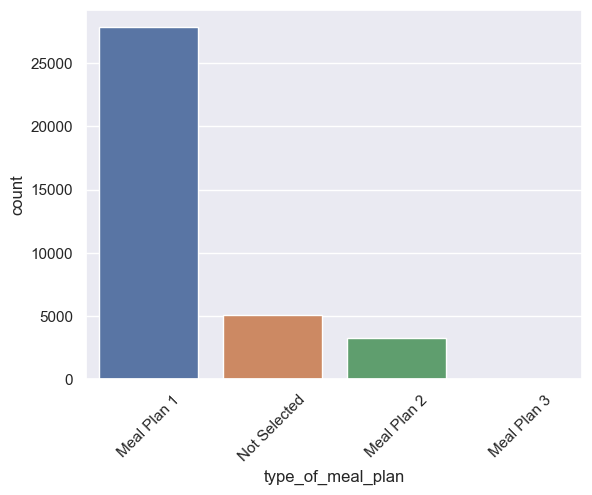

Counts: 
 Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64 

Normalized: 
 Meal Plan 1     76.733287
Not Selected    14.141971
Meal Plan 2      9.110958
Meal Plan 3      0.013784
Name: type_of_meal_plan, dtype: float64

 --------------------x-------------------------


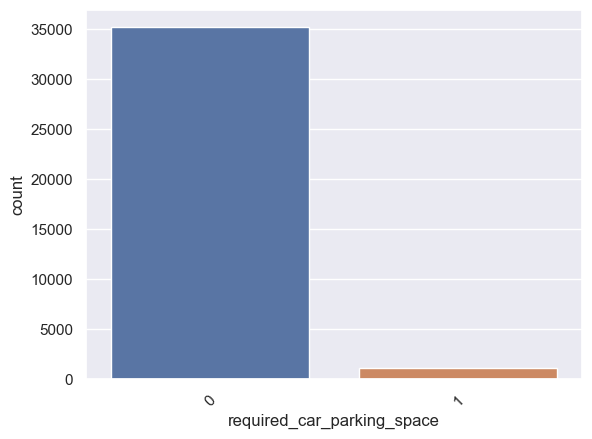

Counts: 
 0    35151
1     1124
Name: required_car_parking_space, dtype: int64 

Normalized: 
 0    96.901447
1     3.098553
Name: required_car_parking_space, dtype: float64

 --------------------x-------------------------


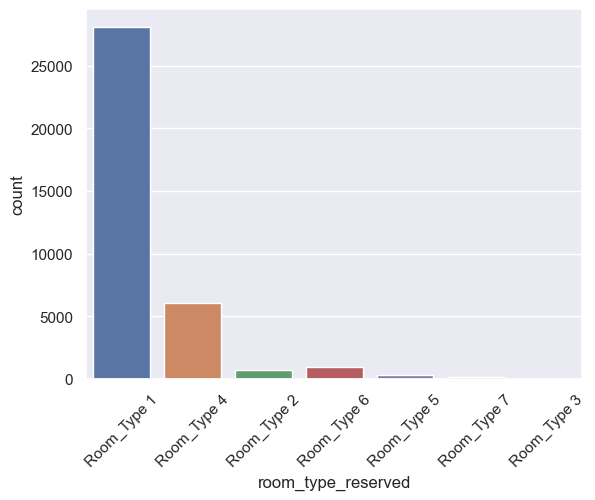

Counts: 
 Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64 

Normalized: 
 Room_Type 1    77.546520
Room_Type 4    16.697450
Room_Type 6     2.662991
Room_Type 2     1.907650
Room_Type 5     0.730531
Room_Type 7     0.435562
Room_Type 3     0.019297
Name: room_type_reserved, dtype: float64

 --------------------x-------------------------


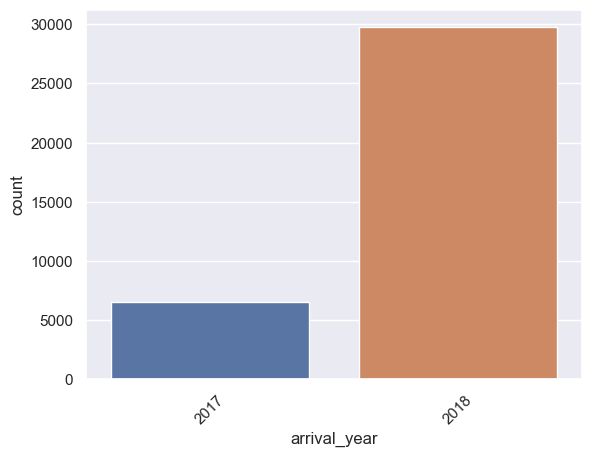

Counts: 
 2018    29761
2017     6514
Name: arrival_year, dtype: int64 

Normalized: 
 2018    82.042729
2017    17.957271
Name: arrival_year, dtype: float64

 --------------------x-------------------------


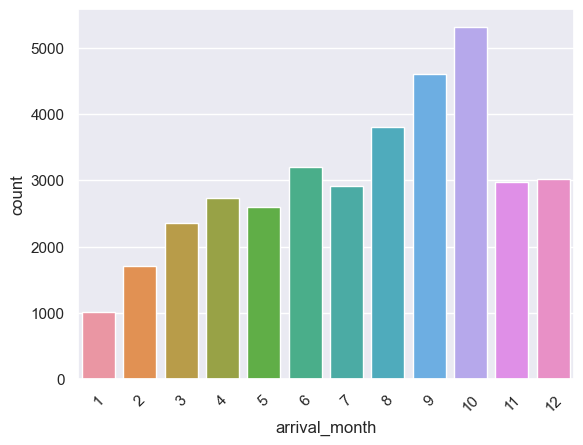

Counts: 
 10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64 

Normalized: 
 10    14.657478
9     12.711234
8     10.511371
6      8.829773
12     8.328050
11     8.215024
7      8.049621
4      7.542385
5      7.161957
3      6.500345
2      4.697450
1      2.795314
Name: arrival_month, dtype: float64

 --------------------x-------------------------


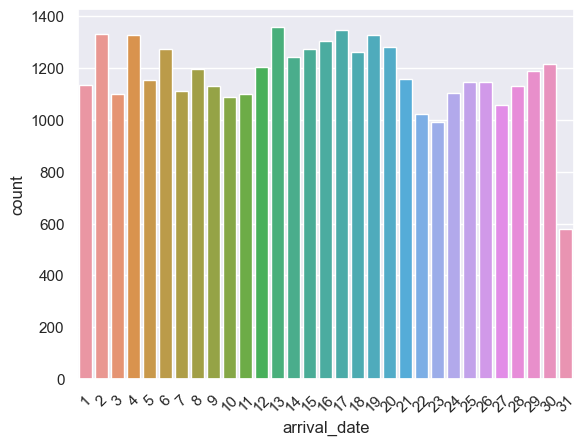

Counts: 
 13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64 

Normalized: 
 13    3.743625
17    3.707788
2     3.669194
4     3.658167
19    3.658167
16    3.600276
20    3.531358
15    3.509304
6     3.509304
18    3.473467
14    3.423846
30    3.352171
12    3.319090
8     3.302550
29    3.280496
21    3.192281
5     3.181254
26    3.159201
25    3.159201
1     3.123363
9     3.115093
28    3.112336
7     3.059959
24    3.040662
11    3.026878
3     3.026878
10    3.002068
27    2.919366
22    2.820124
23    2.729152
31    1.593384
Name: arrival_date, dtype: float64

 --------------------x-------------------------


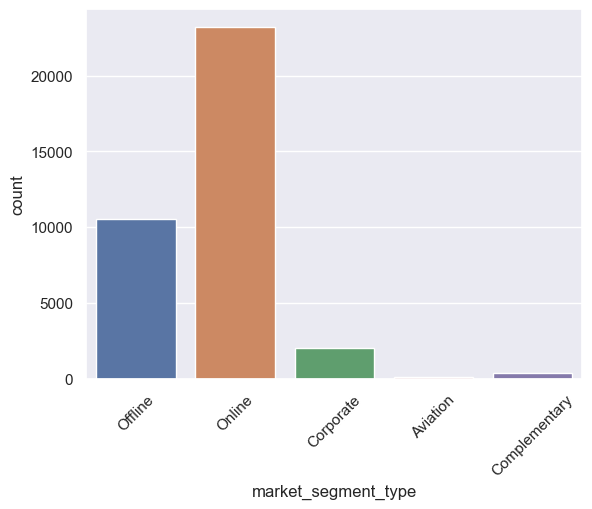

Counts: 
 Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64 

Normalized: 
 Online           63.994487
Offline          29.022743
Corporate         5.560303
Complementary     1.077877
Aviation          0.344590
Name: market_segment_type, dtype: float64

 --------------------x-------------------------


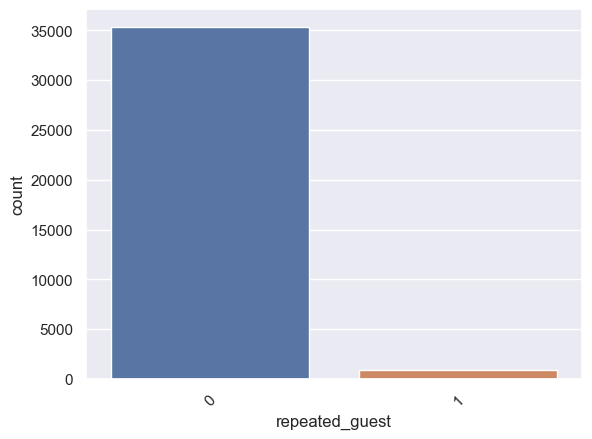

Counts: 
 0    35345
1      930
Name: repeated_guest, dtype: int64 

Normalized: 
 0    97.436251
1     2.563749
Name: repeated_guest, dtype: float64

 --------------------x-------------------------


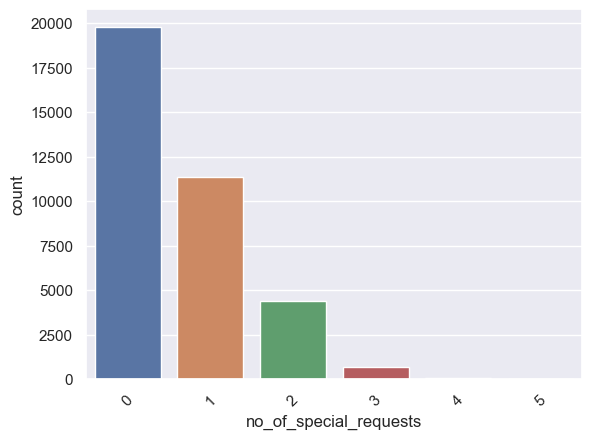

Counts: 
 0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64 

Normalized: 
 0    54.519642
1    31.352171
2    12.030324
3     1.860786
4     0.215024
5     0.022054
Name: no_of_special_requests, dtype: float64

 --------------------x-------------------------


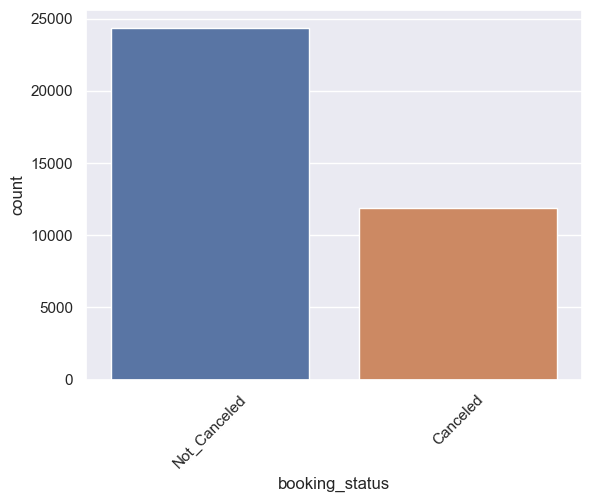

Counts: 
 Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64 

Normalized: 
 Not_Canceled    67.236389
Canceled        32.763611
Name: booking_status, dtype: float64

 --------------------x-------------------------


In [11]:
for x in cats:
    sns.countplot(x=x, data=df)
    plt.xticks(rotation=45)
    plt.show()
    a = df[x].value_counts()
    b = df[x].value_counts(normalize=True)*100
    print('Counts:', '\n', a, '\n')
    print('Normalized:', '\n', b)
    print('\n', '--------------------x-------------------------')

In [12]:
children_only = df.loc[df['no_of_adults'] == 0]
children_only

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0,0,82.44,1,Not_Canceled
287,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,2018,4,24,Online,0,0,0,108.38,1,Canceled
653,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,2018,8,19,Online,0,0,0,115.68,1,Not_Canceled
937,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.67,1,Not_Canceled
954,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,2018,10,29,Online,0,0,0,81.50,2,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,0,2,0,3,Meal Plan 1,0,Room_Type 2,76,2018,9,21,Online,0,0,0,127.38,3,Not_Canceled
34730,0,2,1,1,Meal Plan 1,0,Room_Type 2,178,2018,8,27,Online,0,0,0,88.77,0,Canceled
34890,0,2,2,2,Meal Plan 1,0,Room_Type 2,31,2018,9,16,Online,0,0,0,124.25,2,Not_Canceled
35691,0,2,2,1,Meal Plan 1,0,Room_Type 2,75,2018,3,19,Online,0,0,0,78.00,0,Canceled


In [13]:
zero_children_adults = df.loc[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)].value_counts()
zero_children_adults

Series([], dtype: int64)

In [14]:
# Replace the 3 rows where 9 and 10 children are recorded with 0
# as 0 is the most common
df['no_of_children'] = df['no_of_children'].replace([9, 10], 3)
df.loc[df['no_of_children'] > 3]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [15]:
# Define a function that displays a histogram and a boxplot in one figure
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(x=data[col], ax=ax_box, showmeans=True)
  sns.histplot(x=data[col], ax=ax_hist, kde=True)
  plt.show()

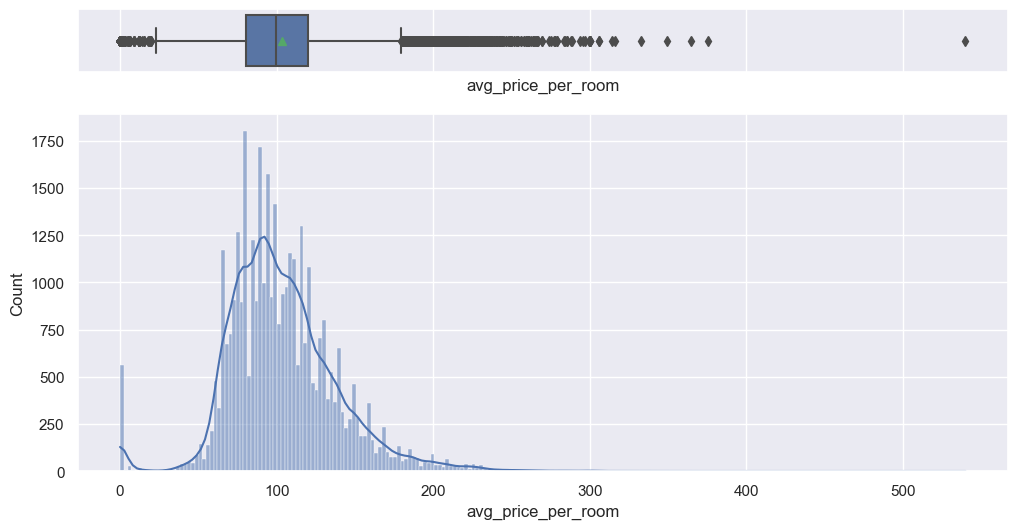

In [16]:
hist_box(df, 'avg_price_per_room')

In [17]:
df.loc[df['avg_price_per_room'] > 400, 'market_segment_type'].value_counts()

Offline    1
Name: market_segment_type, dtype: int64

In [18]:
# Replace the outlier with the upper whisker value

q1 = df['avg_price_per_room'].quantile(.25)
q3 = df['avg_price_per_room'].quantile(.75)

iqr = q3- q1

upper_whisker = q3 + 1.5*iqr
upper_whisker

179.55

In [19]:
df.loc[df['avg_price_per_room'] > 400, 'avg_price_per_room'] = upper_whisker

#df.loc[df['avg_price_per_room']> 400, 'market_segment_type'].value_counts()

In [20]:
df[df['avg_price_per_room'] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


In [21]:
df.loc[df['avg_price_per_room'] == 0, 'market_segment_type'].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

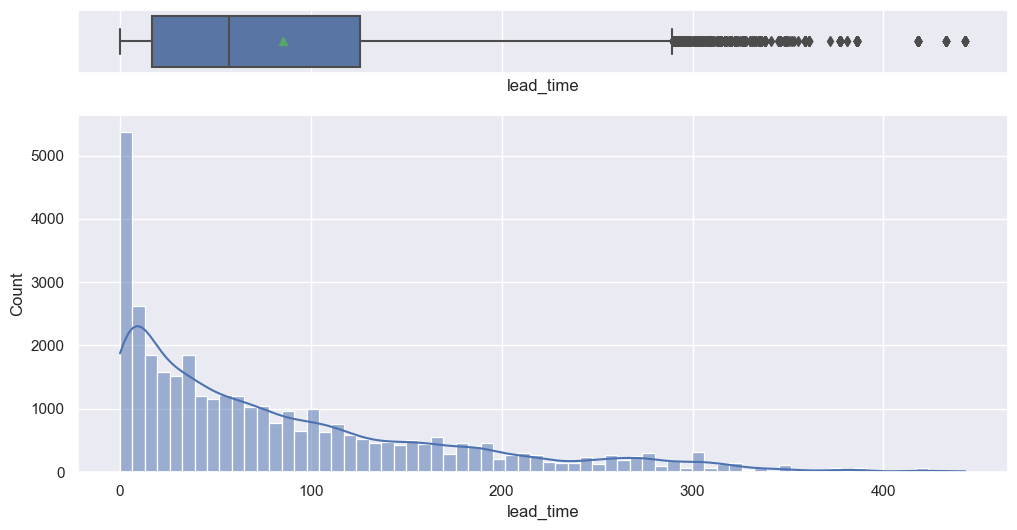

In [22]:
hist_box(df, 'lead_time')

Interesting that there are lead times longer than a year. But there are quite a few outliers so for now no changes will be made

### 5.2) Bivariate analysis

In [23]:
# Encode booking status in binary 
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

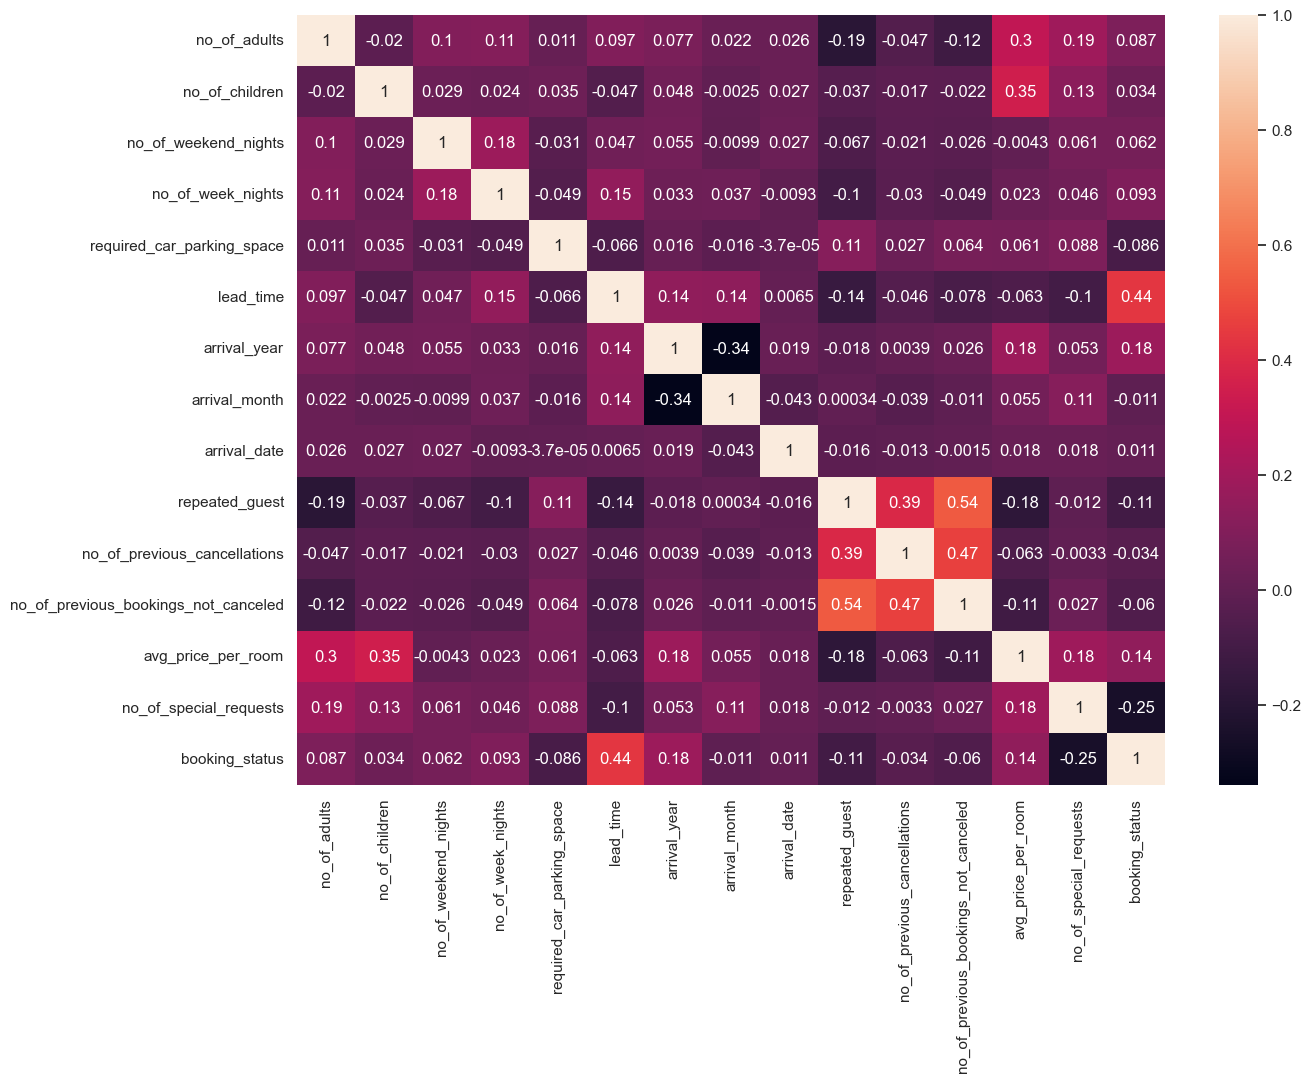

In [41]:
# Plot a correlation matrix
cols_list = df.select_dtypes(include=np.number).columns.tolist()
#print(cols_list)
plt.figure(figsize=(14, 10))
sns.heatmap(df[cols_list].corr(), annot=True)
plt.show()

### Now check how different attributes relate to cancellations

In [24]:
def stacked_barplot(data,predictor,target,figsize=(15,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="best")
  plt.ylabel('Percentage Cancellations %')

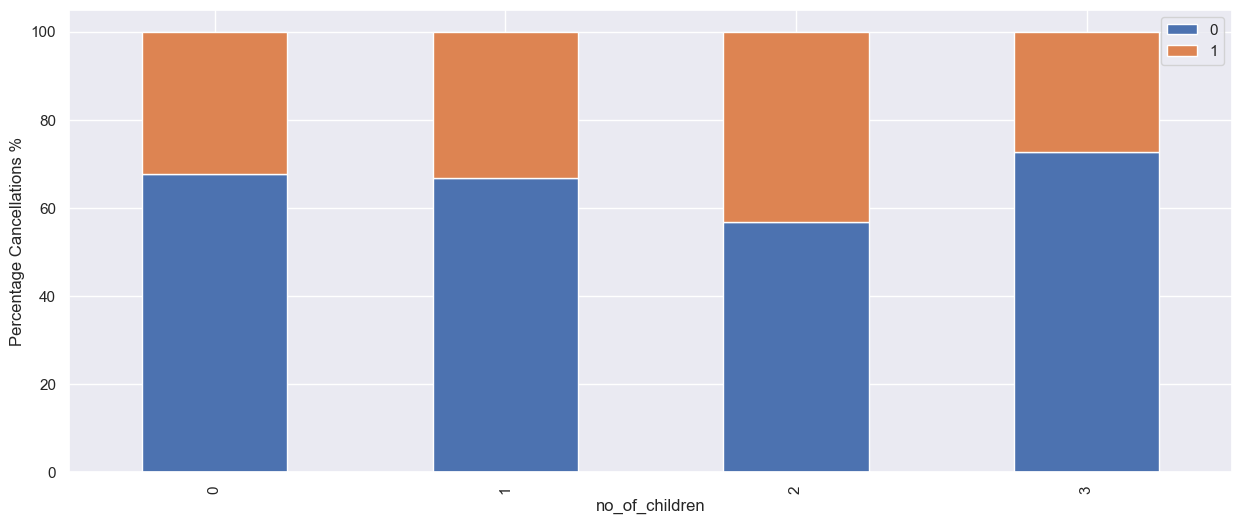

In [25]:
stacked_barplot(df, 'no_of_children', 'booking_status')

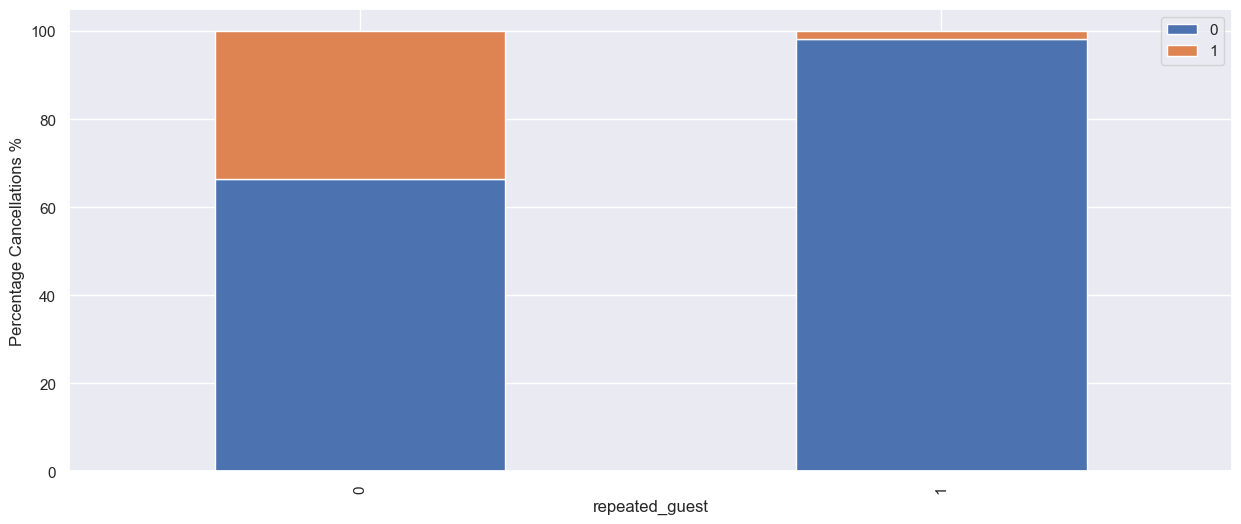

In [26]:
stacked_barplot(df, 'repeated_guest', 'booking_status')

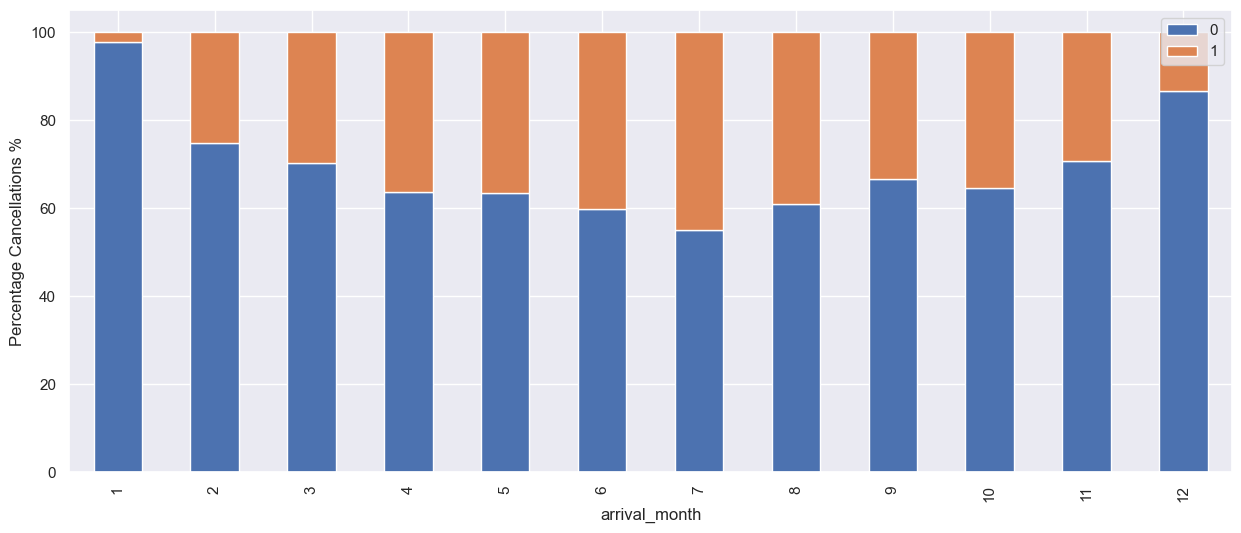

In [27]:
x = stacked_barplot(df, 'arrival_month', 'booking_status')

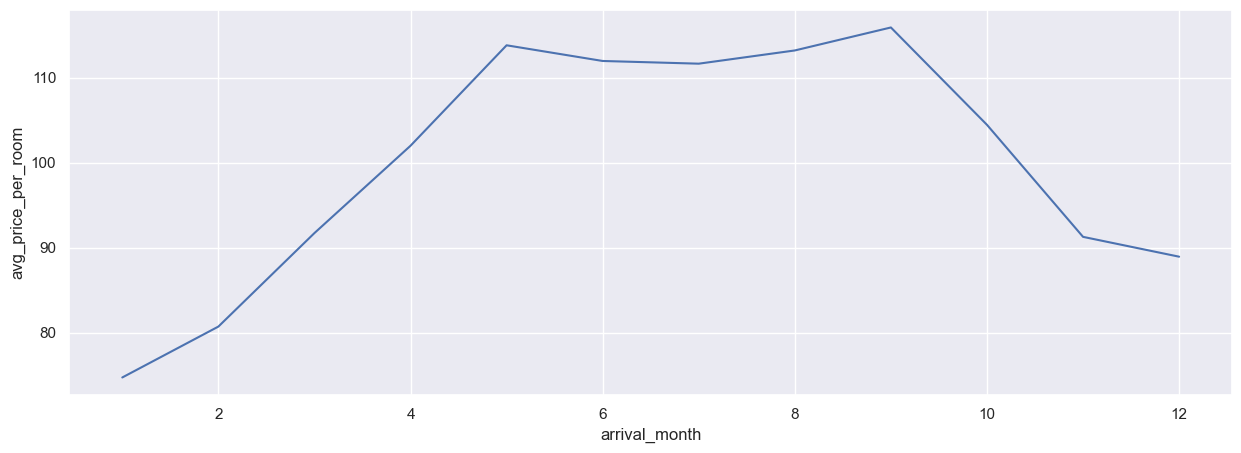

In [28]:
plt.figure(figsize=(15, 5))
sns.lineplot(y=df["avg_price_per_room"], x=df["arrival_month"], ci=None)
plt.show()

Cancellations per month follows the trend of average price per room per month which makes sense. 

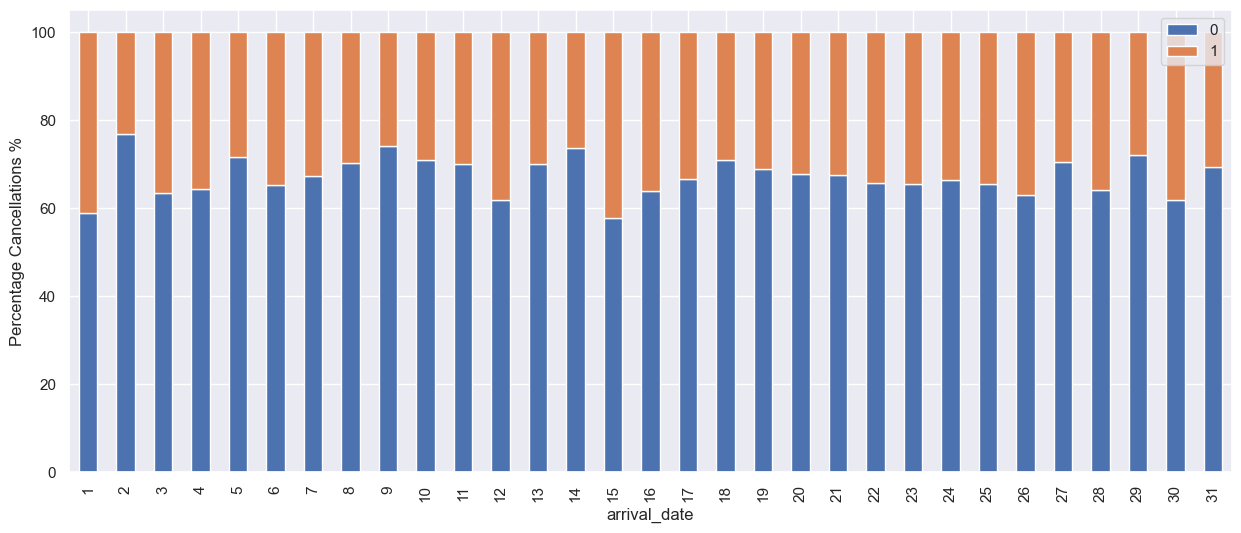

In [29]:
x = stacked_barplot(df, 'arrival_date', 'booking_status')

No discernible trend between arrival date and cancellations

#### A useful relationship might be between the lenght of stay and cancellations

In [30]:
stay_length = df[(df['no_of_week_nights'] > 0) | (df['no_of_weekend_nights'] > 0)]
stay_length

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


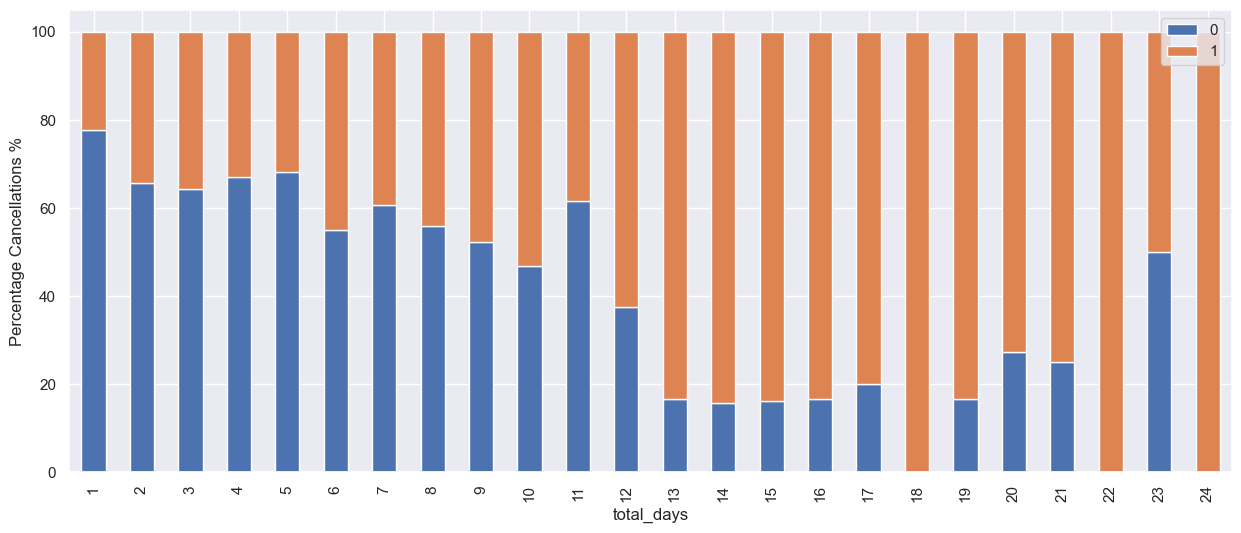

In [31]:
stay_length['total_days'] = (stay_length['no_of_week_nights'] + stay_length['no_of_weekend_nights'])

stacked_barplot(stay_length, 'total_days', 'booking_status')

Bookings for longer stays have a higher rate of cancellations

#### Check relationship between price and market segment type

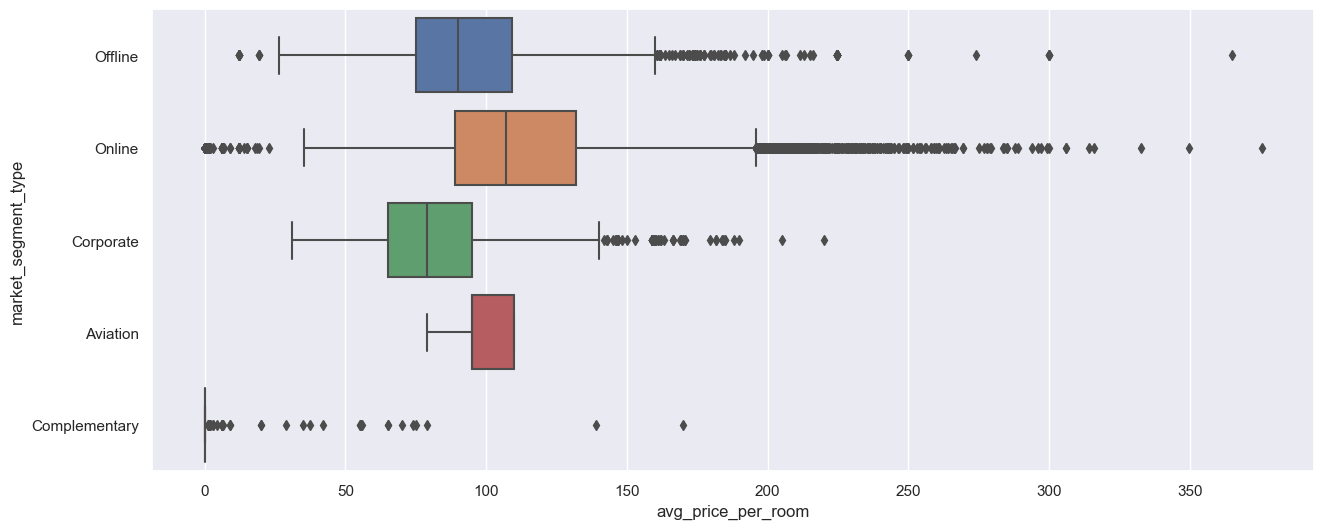

In [33]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='avg_price_per_room', y = 'market_segment_type')
plt.show()

Offline and online market segments have quite a large variation in prices

## 6) Data preparation for modelling

In [42]:
# Seperate the predictors and the target variable

X = df.drop(['booking_status', 'arrival_date'], axis=1) # drop arrival date column since it doesn't show any discernible trends
Y = df['booking_status']

# Encode the categorical variables
X = pd.get_dummies(X, drop_first=True)

#### Split the data into 80% train and 20% test set

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=1)

In [44]:
print(X_train.shape, X_test.shape)

(29020, 26) (7255, 26)


In [45]:
print(Y_train.value_counts())
print(Y_test.value_counts())

0    19512
1     9508
Name: booking_status, dtype: int64
0    4878
1    2377
Name: booking_status, dtype: int64


#### Using sklearn, create a function to calculate precision, recall, F1 score and accuracy. Also create a confusion matrix to evaluate each model  

Precision and recall scores indicate false positives and false negatives respectively

In [46]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not cancelled', 'Cancelled'],
               yticklabels=['Not cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [47]:
def plot_metrics_score(ytrain, ytrain_pred, ytest, ytest_pred):
    metrics_score(ytrain, ytrain_pred)
    metrics_score(ytest, ytest_pred)

## 7) Data modelling

### 7.1) Logistic regression 

Train and test data give very similar results for precision, recall and f1 scores. 
Next plot precision and recall curves to find the optimal threshold

#### Apply scaling 

In [48]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [49]:
lg = LogisticRegression()
lg.fit(X_train_scaled, Y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     19512
           1       0.74      0.63      0.68      9508

    accuracy                           0.81     29020
   macro avg       0.79      0.76      0.77     29020
weighted avg       0.80      0.81      0.80     29020



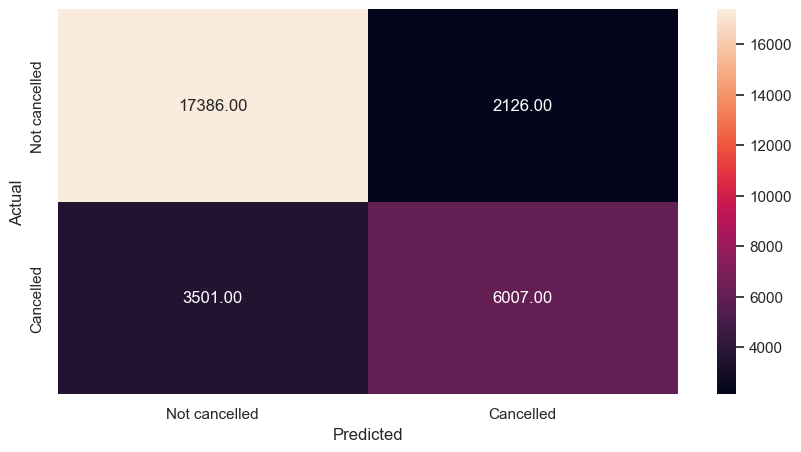

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4878
           1       0.74      0.64      0.68      2377

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255



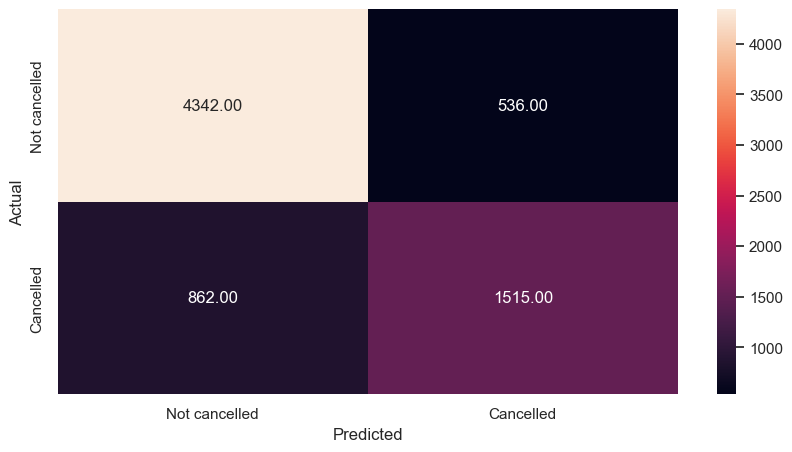

In [50]:
y_pred_train = lg.predict(X_train_scaled)
y_pred_test = lg.predict(X_test_scaled)
plot_metrics_score(Y_train, y_pred_train, Y_test, y_pred_test)    

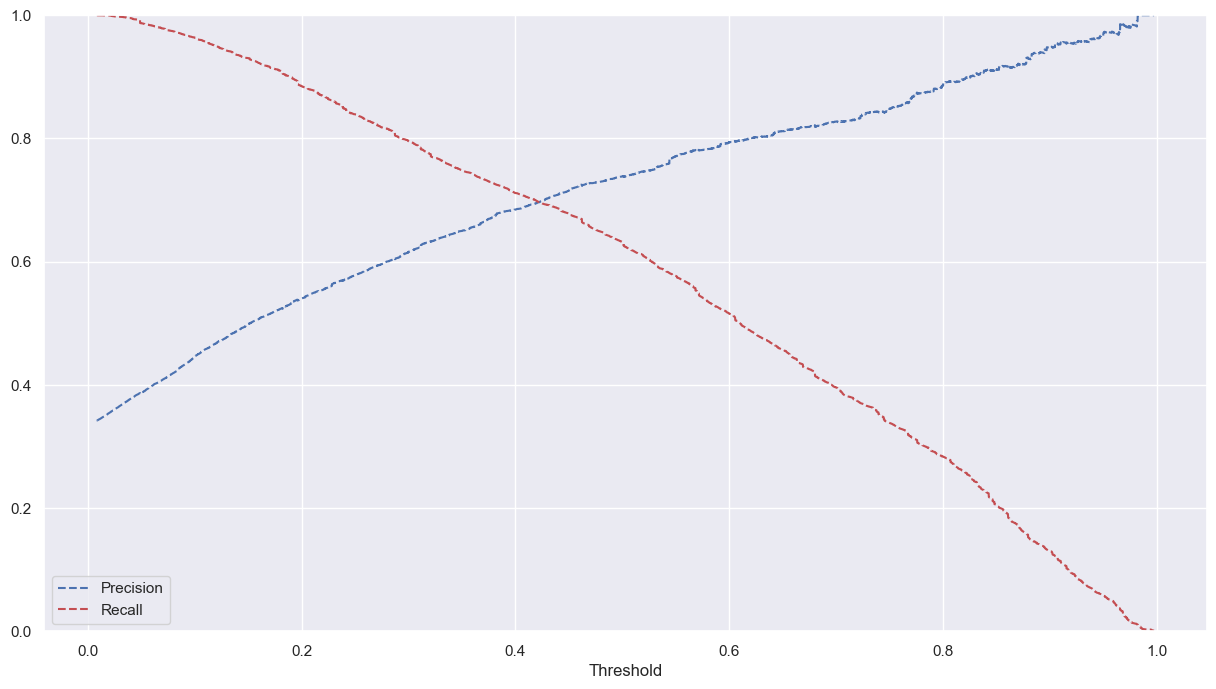

In [73]:
y_scores_lg = lg.predict_proba(X_train_scaled)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(Y_train, y_scores_lg[:,1])

plt.figure(figsize=(15,8))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='Precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.ylim([0,1])
plt.show()

In [52]:
optimal_thres = .43

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     19512
           1       0.70      0.69      0.70      9508

    accuracy                           0.80     29020
   macro avg       0.78      0.77      0.78     29020
weighted avg       0.80      0.80      0.80     29020



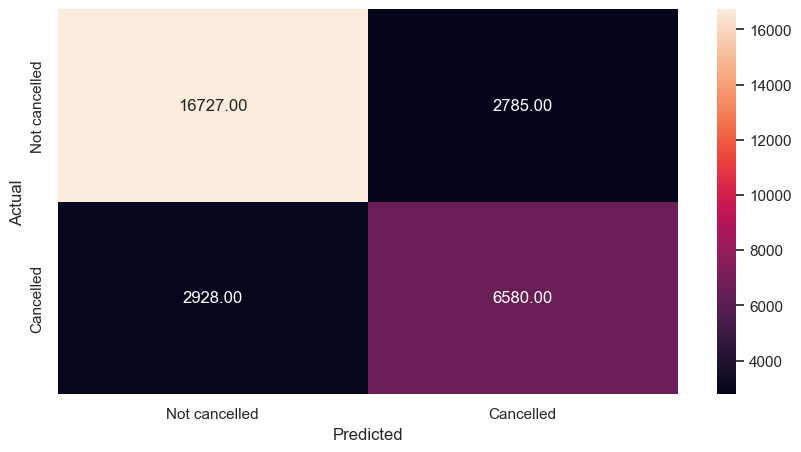

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4878
           1       0.70      0.70      0.70      2377

    accuracy                           0.80      7255
   macro avg       0.78      0.78      0.78      7255
weighted avg       0.80      0.80      0.80      7255



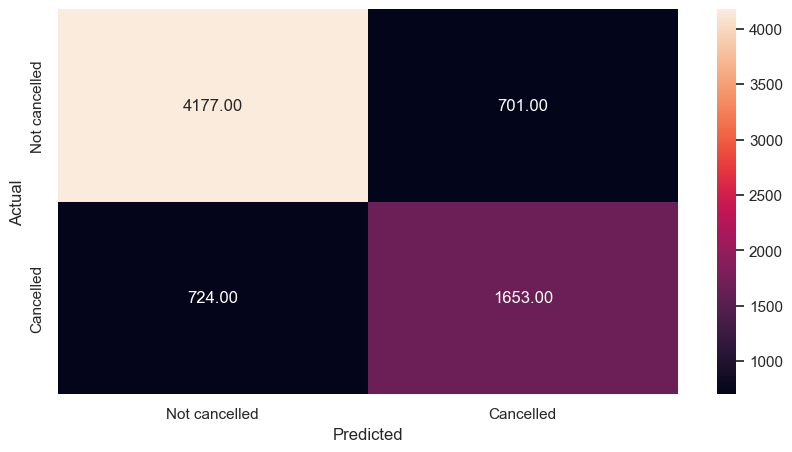

In [53]:
y_pred_train = lg.predict_proba(X_train_scaled)
y_pred_test = lg.predict_proba(X_test_scaled)
plot_metrics_score(Y_train, y_pred_train[:,1] >= optimal_thres, 
                 Y_test, y_pred_test[:,1] >= optimal_thres)    

### 7.2) Support vector machines (SVM)

#### 7.2.1) Linear kernel

In [54]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, Y_train)

SVC(kernel='linear', probability=True)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     19512
           1       0.75      0.61      0.67      9508

    accuracy                           0.80     29020
   macro avg       0.79      0.75      0.77     29020
weighted avg       0.80      0.80      0.80     29020



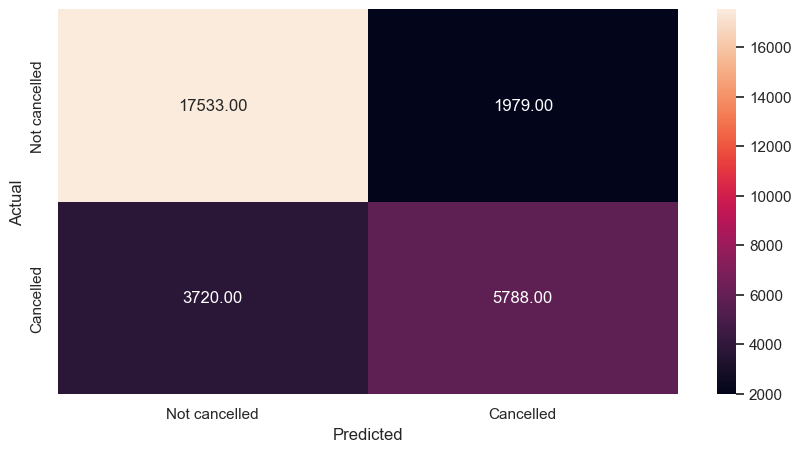

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4878
           1       0.75      0.61      0.67      2377

    accuracy                           0.81      7255
   macro avg       0.79      0.75      0.77      7255
weighted avg       0.80      0.81      0.80      7255



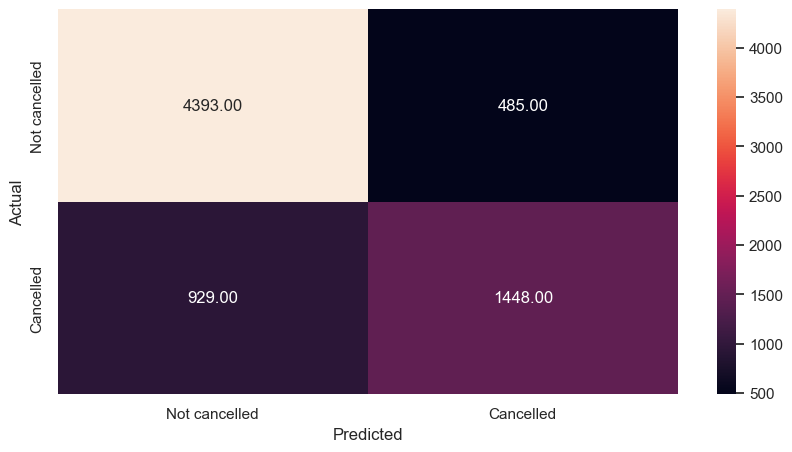

In [55]:
y_pred_train_svm = svm.predict(X_train_scaled)
y_pred_test_svm = svm.predict(X_test_scaled)
plot_metrics_score(Y_train, y_pred_train_svm, Y_test, y_pred_test_svm)

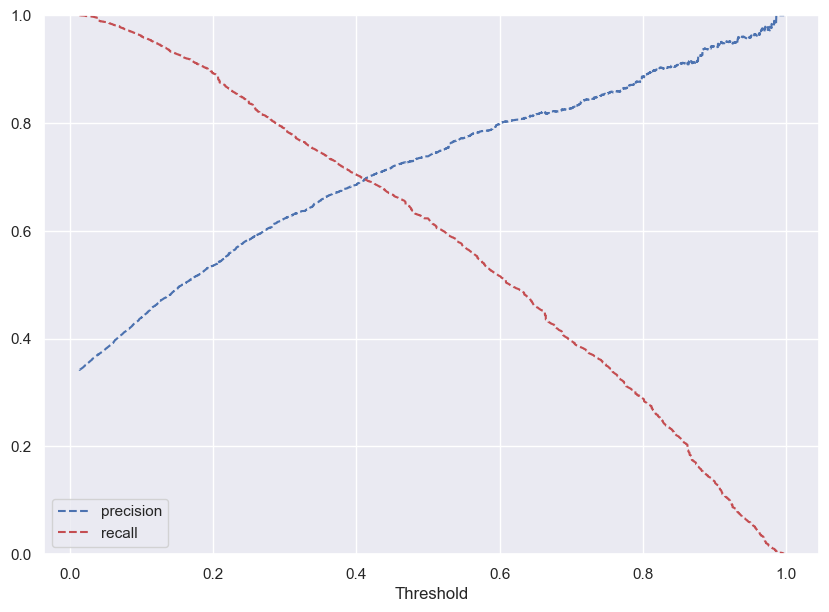

In [56]:
y_scores_svm = svm.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(Y_train,
                                                    y_scores_svm[:,1])

plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'r--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.ylim([0,1])
plt.show()

In [57]:
optimal_thres_svm = 0.41

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     19512
           1       0.69      0.70      0.69      9508

    accuracy                           0.80     29020
   macro avg       0.77      0.77      0.77     29020
weighted avg       0.80      0.80      0.80     29020



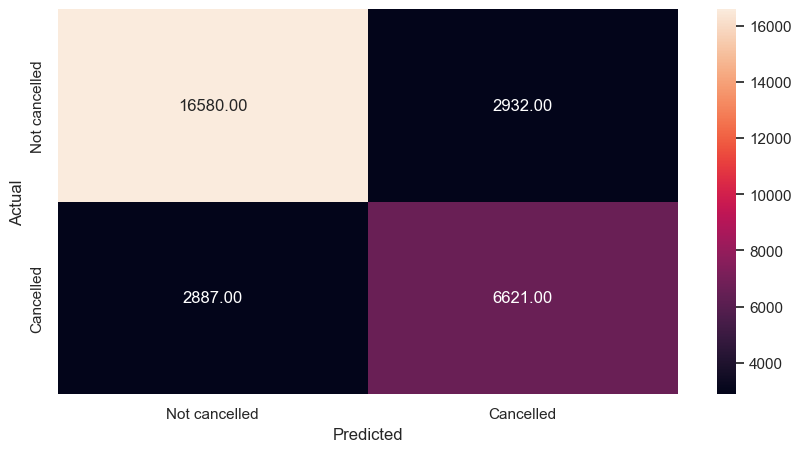

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4878
           1       0.70      0.71      0.70      2377

    accuracy                           0.80      7255
   macro avg       0.78      0.78      0.78      7255
weighted avg       0.80      0.80      0.80      7255



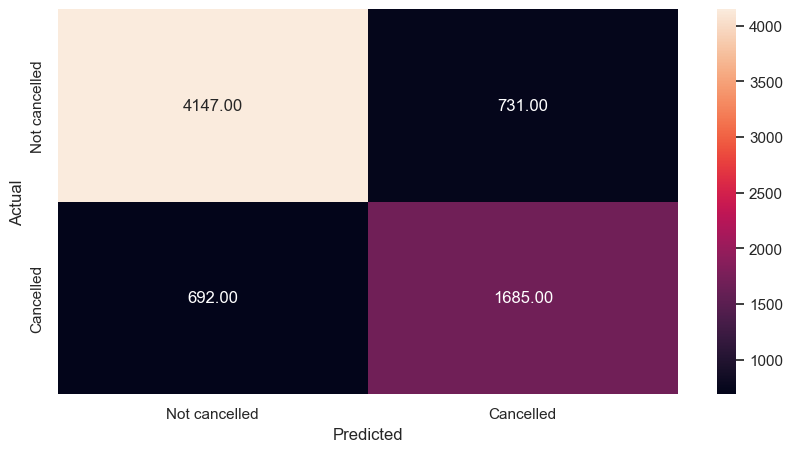

In [58]:
y_pred_train_svm = svm.predict_proba(X_train_scaled)
y_pred_test_svm = svm.predict_proba(X_test_scaled)

plot_metrics_score(Y_train, y_pred_train_svm[:,1] >= optimal_thres_svm,
                Y_test, y_pred_test_svm[:,1] >= optimal_thres_svm)

#### 7.2.2) RBF kernel

In [59]:
svm_rbf = SVC(kernel = 'rbf', probability=True)
svm_rbf.fit(X_train_scaled, Y_train)

SVC(probability=True)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     19512
           1       0.77      0.66      0.71      9508

    accuracy                           0.82     29020
   macro avg       0.81      0.78      0.79     29020
weighted avg       0.82      0.82      0.82     29020



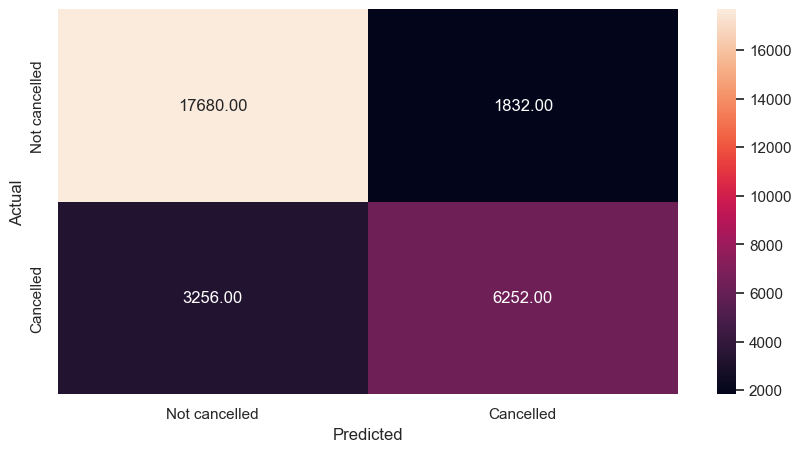

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4878
           1       0.77      0.65      0.71      2377

    accuracy                           0.82      7255
   macro avg       0.81      0.78      0.79      7255
weighted avg       0.82      0.82      0.82      7255



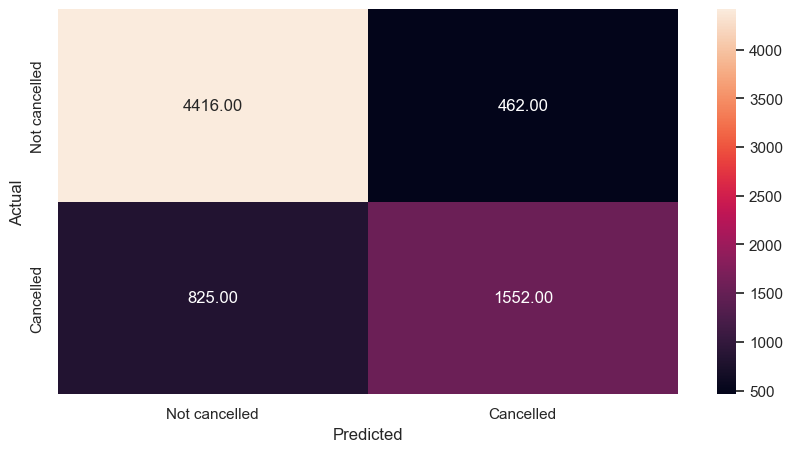

In [60]:
y_pred_train_rbf = svm_rbf.predict(X_train_scaled)
y_pred_test_rbf = svm_rbf.predict(X_test_scaled)

plot_metrics_score(Y_train, y_pred_train_rbf, Y_test, y_pred_test_rbf)

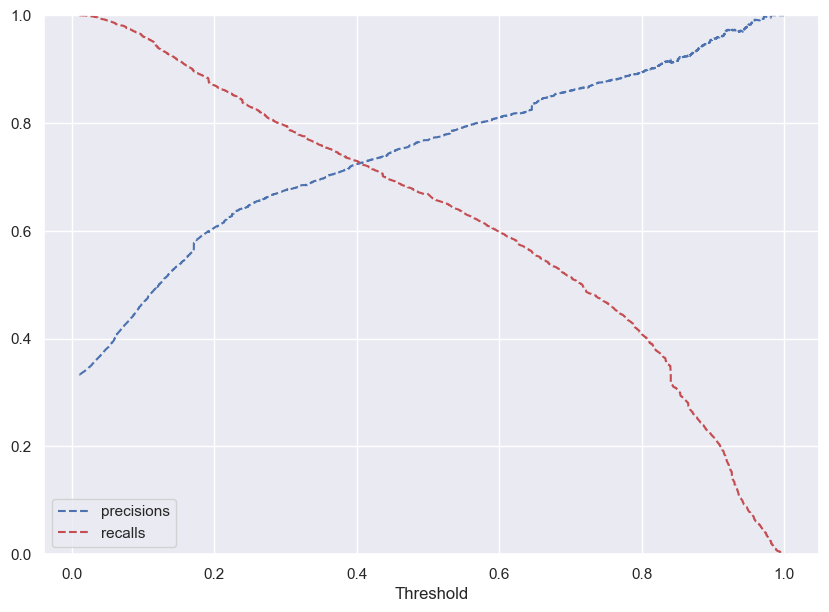

In [61]:
y_scores_rbf = svm_rbf.predict_proba(X_train_scaled)

precisions_rbf, recalls_rbf, thresholds_rbf = precision_recall_curve(Y_train,
                                                y_scores_rbf[:,1])

plt.figure(figsize=(10,7))
plt.plot(thresholds_rbf, precisions_rbf[:-1], 'b--', label='precisions')
plt.plot(thresholds_rbf, recalls_rbf[:-1], 'r--', label=('recalls'))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.ylim([0,1])
plt.show()

In [62]:
optimal_thres_rbf = 0.41

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     19512
           1       0.73      0.72      0.72      9508

    accuracy                           0.82     29020
   macro avg       0.80      0.80      0.80     29020
weighted avg       0.82      0.82      0.82     29020



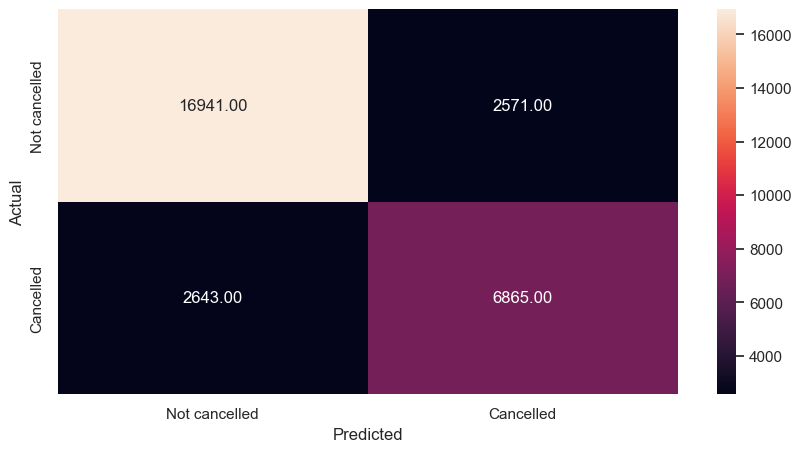

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4878
           1       0.73      0.73      0.73      2377

    accuracy                           0.82      7255
   macro avg       0.80      0.80      0.80      7255
weighted avg       0.82      0.82      0.82      7255



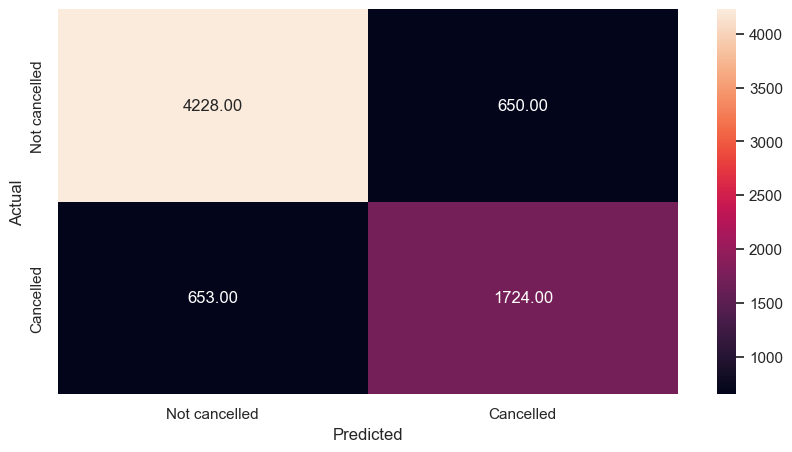

In [63]:
y_pred_train_rbf = svm_rbf.predict_proba(X_train_scaled)
y_pred_test_rbf = svm_rbf.predict_proba(X_test_scaled)

plot_metrics_score(Y_train, y_pred_train_rbf[:,1] >= optimal_thres_rbf,
                   Y_test, y_pred_test_rbf[:,1] >= optimal_thres_rbf)

## 7.3) Decision tree model

In [64]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19512
           1       1.00      0.98      0.99      9508

    accuracy                           0.99     29020
   macro avg       0.99      0.99      0.99     29020
weighted avg       0.99      0.99      0.99     29020



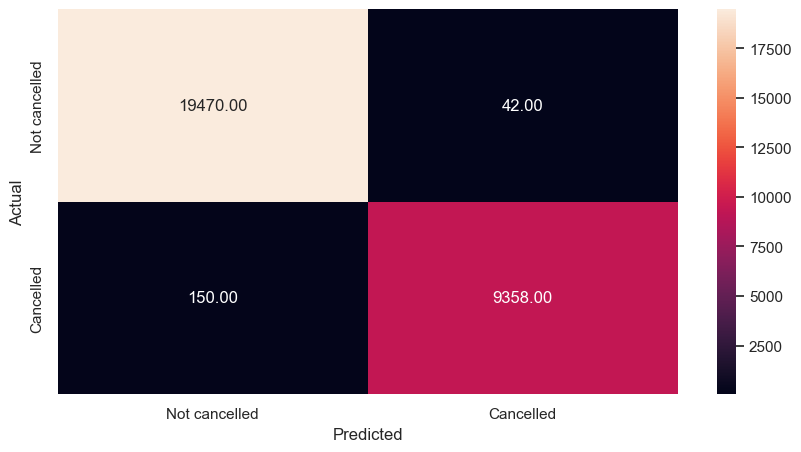

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4878
           1       0.79      0.81      0.80      2377

    accuracy                           0.87      7255
   macro avg       0.85      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255



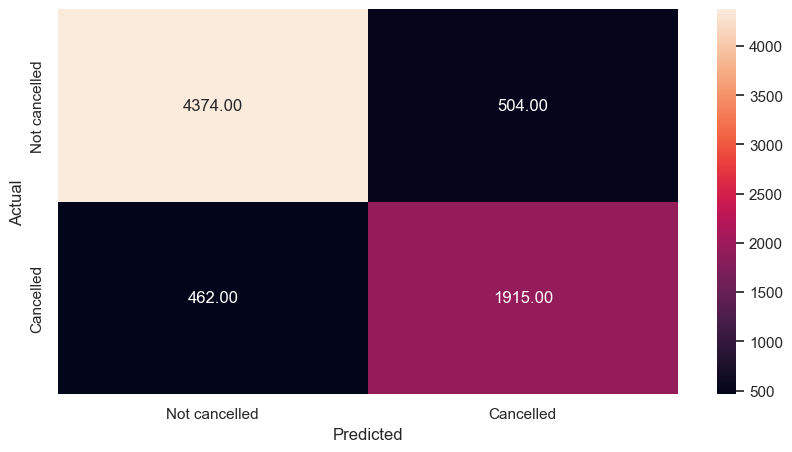

In [65]:
dt_pred_train = dt.predict(X_train_scaled)
dt_pred_test = dt.predict(X_test_scaled)

plot_metrics_score(Y_train, dt_pred_train, Y_test, dt_pred_test)


#### Hyperparameter tuning

In [66]:
# Use grid search cv to tune the decision tree model to try and reduce overfitting
parameters = {
    'max_depth': np.arange(2, 25, 2),
    'max_leaf_nodes': np.arange(10, 251, 10),
    'min_samples_split': np.arange(10, 101, 10)
}

grid_obj = GridSearchCV(dt, parameters, cv=5, scoring='recall', n_jobs=-1)
grid_obj = grid_obj.fit(X_train_scaled, Y_train)

estimator = grid_obj.best_estimator_

estimator.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=170, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     19512
           1       0.86      0.77      0.82      9508

    accuracy                           0.89     29020
   macro avg       0.88      0.86      0.87     29020
weighted avg       0.88      0.89      0.88     29020



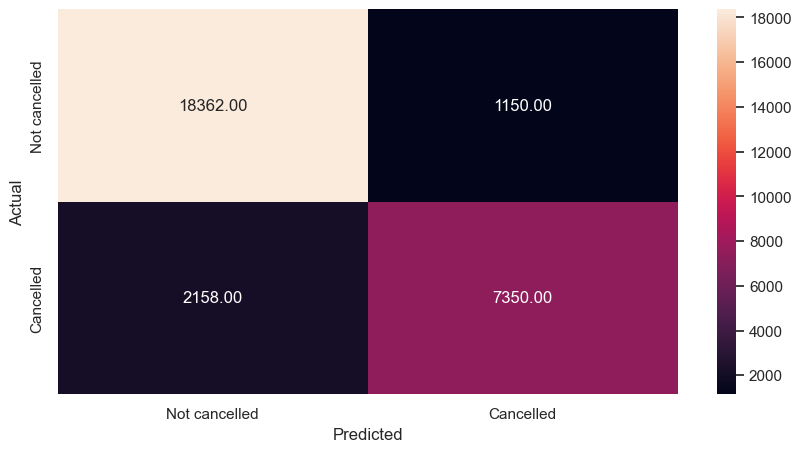

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4878
           1       0.85      0.76      0.80      2377

    accuracy                           0.88      7255
   macro avg       0.87      0.85      0.86      7255
weighted avg       0.88      0.88      0.87      7255



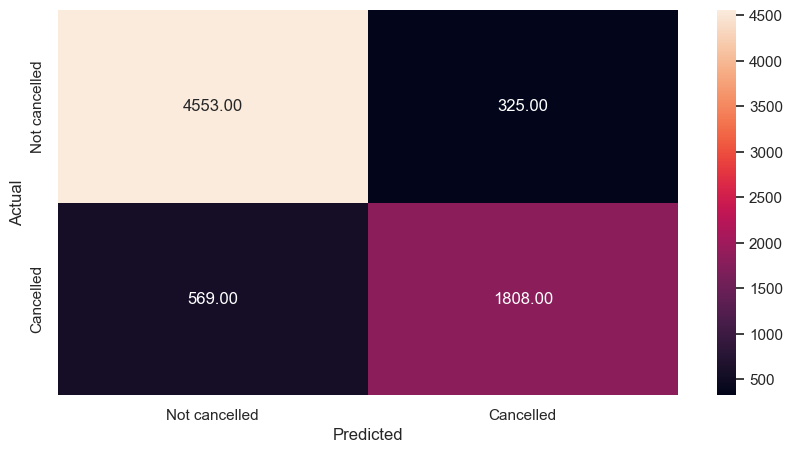

In [67]:
dt_train_tuned = estimator.predict(X_train_scaled)
dt_test_tuned = estimator.predict(X_test_scaled)

plot_metrics_score(Y_train, dt_train_tuned, Y_test, dt_test_tuned)

#### Visualising the decision tree

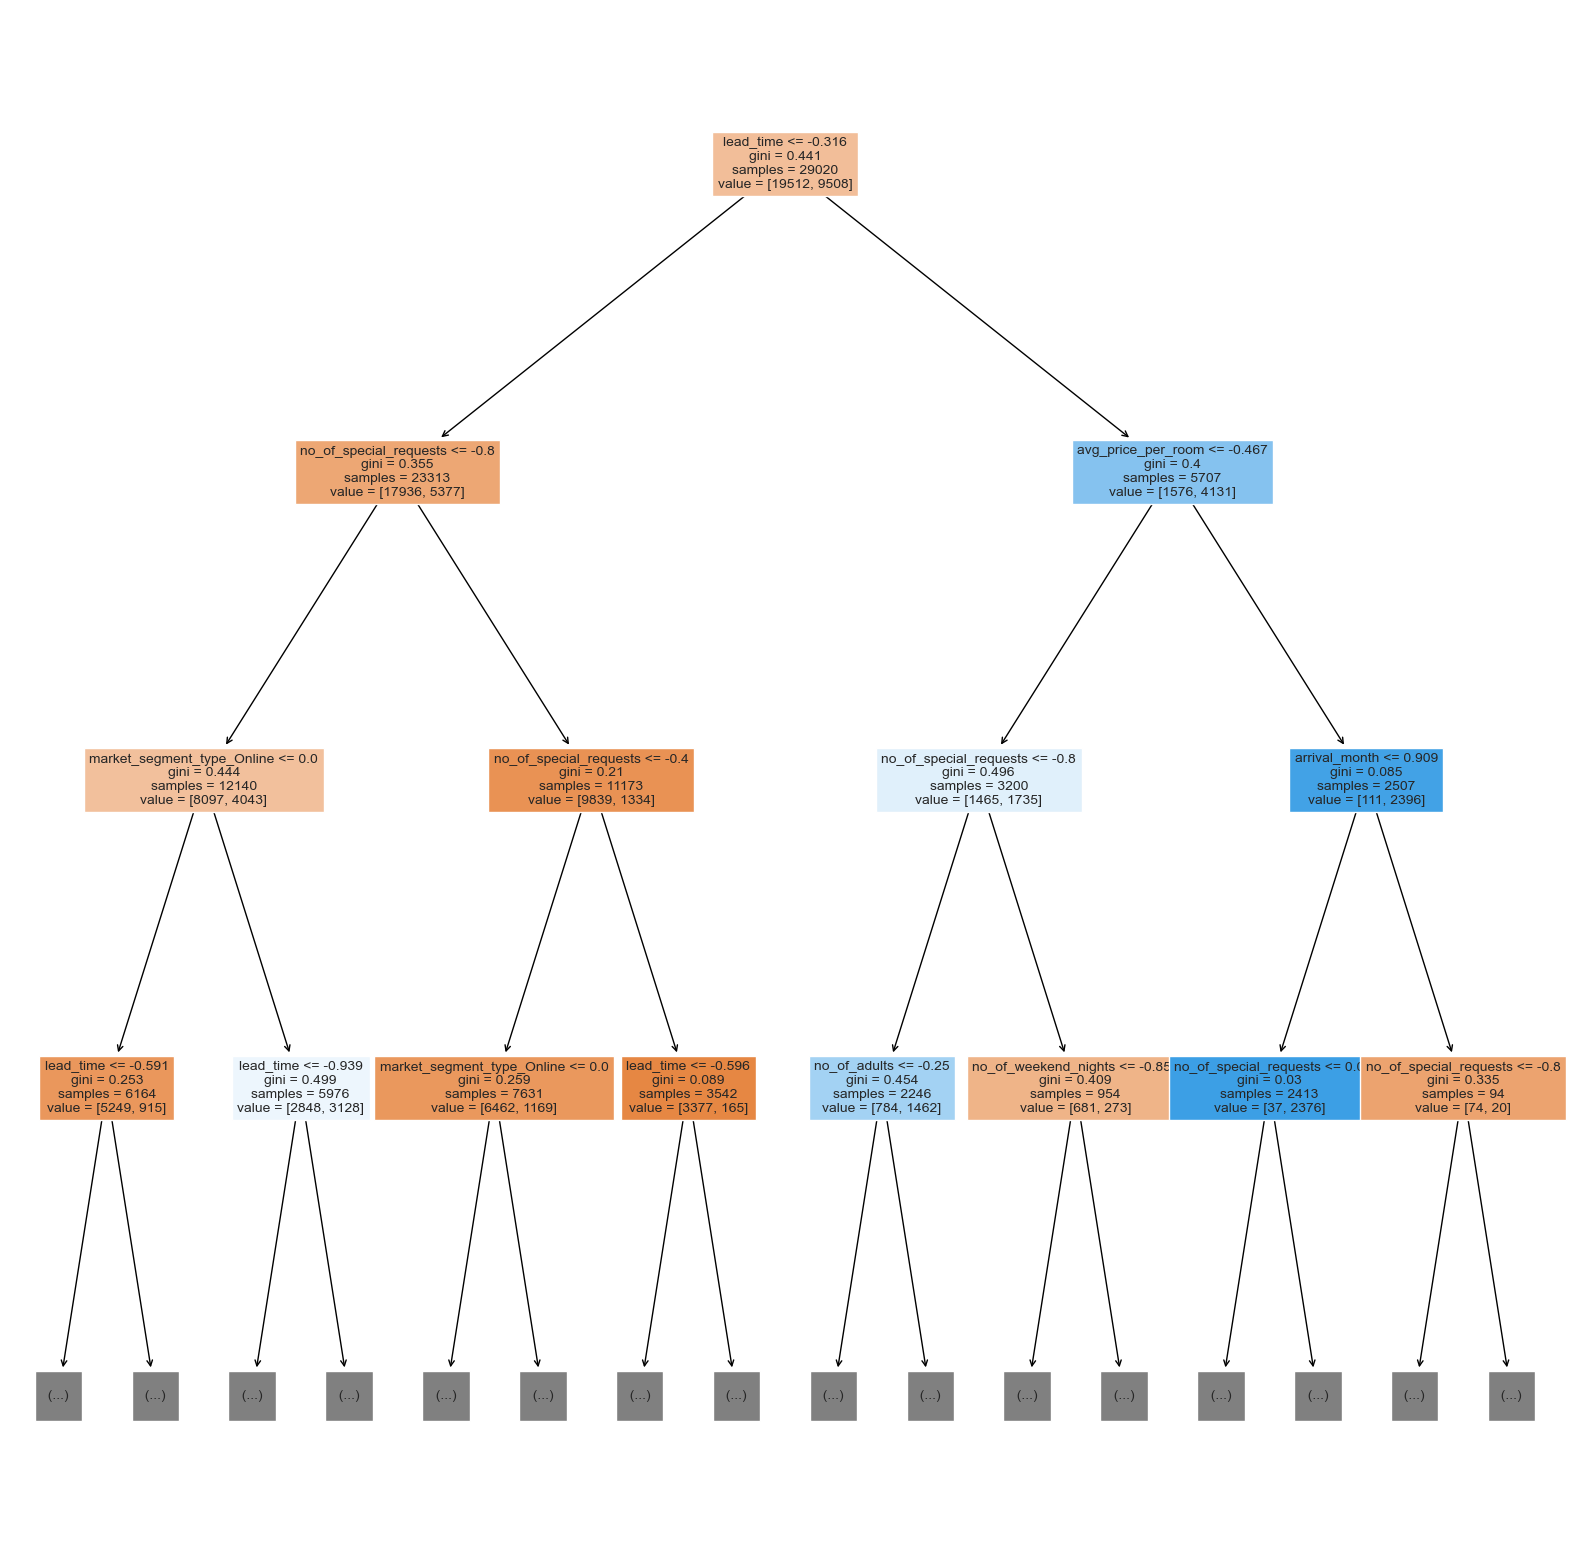

In [68]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20,20))
out = tree.plot_tree(
    estimator, max_depth=3,
    feature_names = feature_names,
    filled=True,
    fontsize=10,
    node_ids=False,
    class_names=None
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

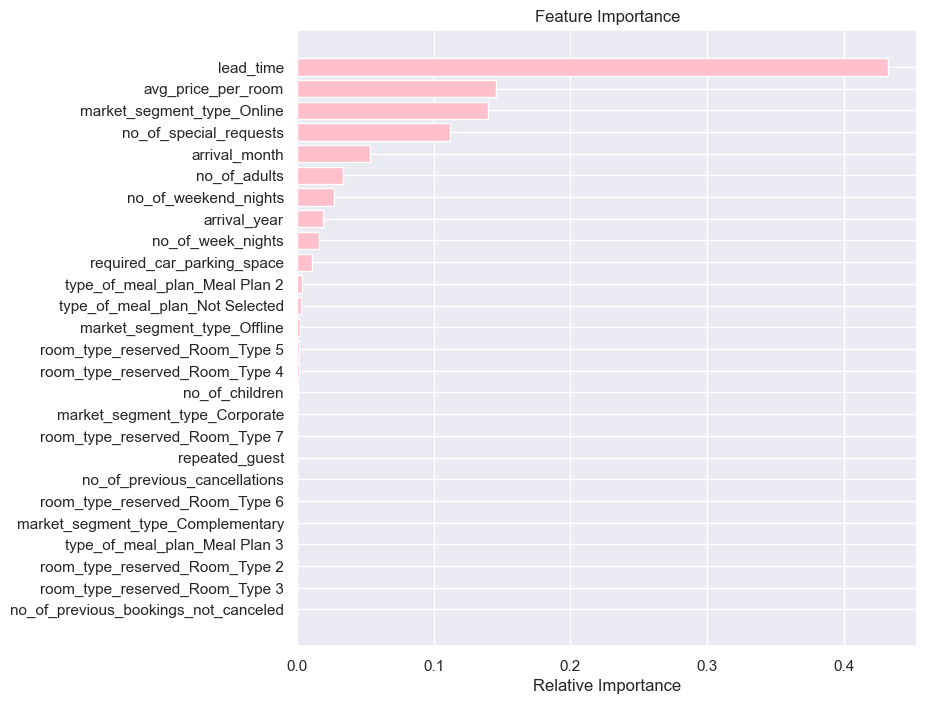

In [69]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='pink', 
         align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 7.4) Random forest model

In [70]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19512
           1       0.99      0.99      0.99      9508

    accuracy                           0.99     29020
   macro avg       0.99      0.99      0.99     29020
weighted avg       0.99      0.99      0.99     29020



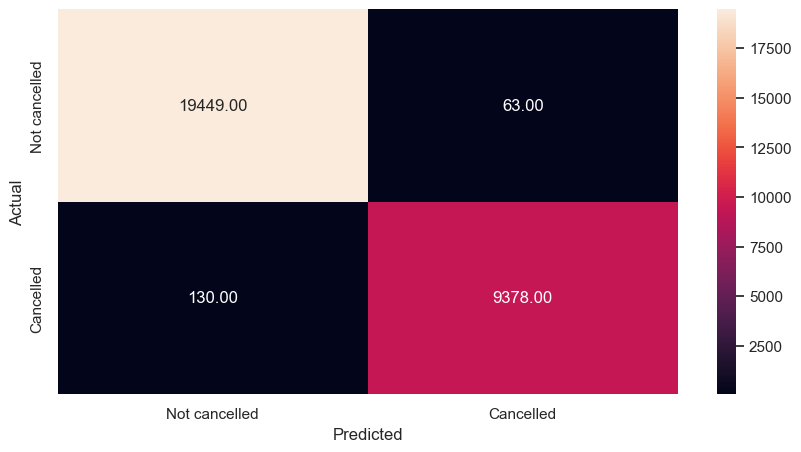

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4878
           1       0.87      0.81      0.84      2377

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.88      7255
weighted avg       0.90      0.90      0.90      7255



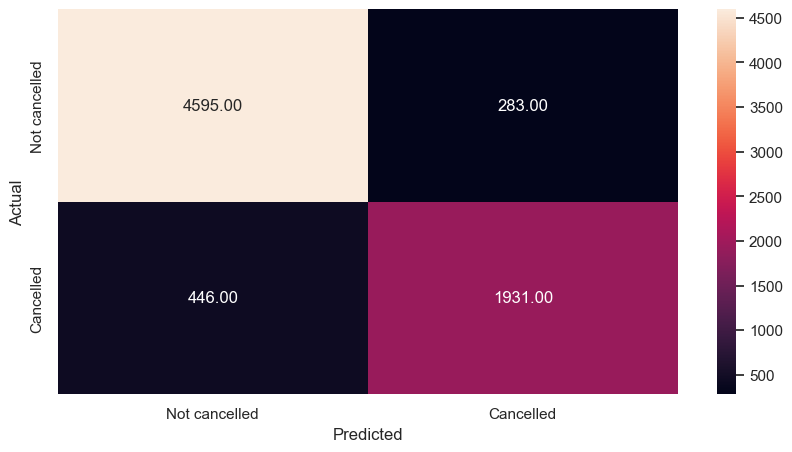

In [71]:
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

plot_metrics_score(Y_train, y_pred_train_rf, Y_test, y_pred_test_rf)

<AxesSubplot:xlabel='Importance'>

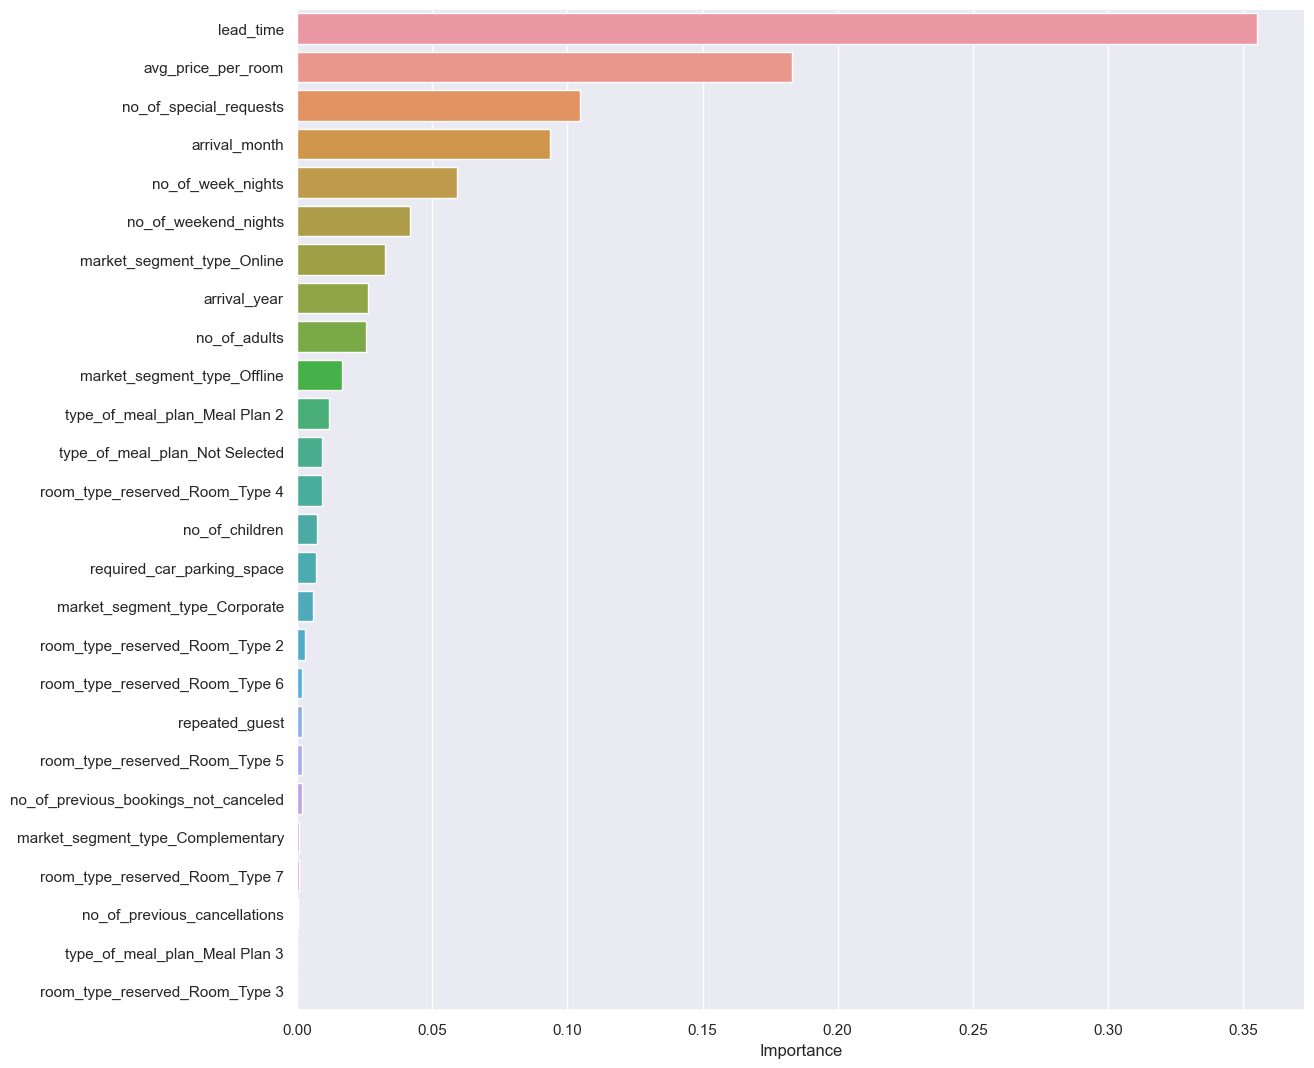

In [72]:
importances = rf.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, 
                             index = columns, 
                             columns = ['Importance']).sort_values(by='Importance',
                                                                  ascending=False)

plt.figure(figsize = (13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
#sns.barplot(importance_df.Importance, importance_df.index)

##  8) Key insights for client to improve their busines model

•	<5% of repeat guests cancel their bookings however majority of the hotel’s guests are new customers. New customers cancel their bookings ~35% of the time. The hotel needs to invest in strategies to increase brand reputation to encourage repeat customers.

•	Corporate market segment has a low cancellation of ~10%. Targeted marketing and pursuing contracts with corporations might benefit the hotel to ensure reliable repeat guests.

•	Highest average prices are during May – September which also falls during peak holiday time and school summer holidays in Europe. This makes sense however it might be discouraging families from booking as the hotel gets very few bookings with children. The months of May – September is also when approximately 40% of bookings are cancelled. The hotel might want to investigate advertising strategies directed towards families and offer additional perks or facilities that incentivise people to keep their bookings. 

•	Bookings with short lead times also have short cooling off period. This probably means that guests are charged a fee to cancel which will discourage cancellations. However, bookings with longer lead times have more time to cancel without negative consequence. The hotel needs to target bookings with long lead times to provide them with incentives to keep their booking. 

•	According to this dataset, none of the bookings with >=3 special requests have been cancelled. This creates a node with low entropy which is probably why this feature is of high importance. However, the hotel can investigate the types of special requests that are more common and implement strategies to accommodate them to further improve their brand reputation and discourage cancellations.

•	There are additional information (features) that can be gathered that might help develop a better ML model and help the hotel: 

1) Reasons for booking and cancellations

2) Time between arrival date and cancellation – how close to the arrival date was the booking cancelled might give additional insight and help the hotel strategize to avoid this

3) Ages of the guests